# SEMMA
Dataset Source: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset


### What is SEMMA?
SEMMA is another methodology that was developed by one of the largest analytic companies in the world, the SAS institute.

SEMMA stands for Sample, Explore, Modify, Model, Assess.



In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data  = pd.read_csv("/content/drive/MyDrive/SJSU/CMPE_255/assignment_03/datasets/used_cars.csv")

In [5]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [6]:
# Convert the price column into float values.
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-6-a71c77e123f6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)


We've successfully loaded the dataset and displayed the first few rows. Here's a quick summary of the columns:

brand: Brand of the car (e.g., Ford, Hyundai).
model: Model of the car (e.g., Utility Police Interceptor Base, Palisade SEL).
model_year: Year of manufacture (e.g., 2013, 2021).  
milage: Mileage of the car (e.g., 51,000 mi.).  
fuel_type: Type of fuel the car uses (e.g., E85 Flex Fuel, Gasoline).  
engine: Engine details (e.g., 300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capacity).  
transmission: Transmission type (e.g., 6-Speed A/T, Automatic).  
ext_col: Exterior color of the car (e.g., Black, Blue).  
int_col: Interior color of the car (e.g., Black, Gray).  
accident: Accident history (e.g., At least 1 accident or damage reported, None reported).  
clean_title: Whether the car has a clean title (Yes/No/NaN).  
price: Price of the car (e.g., $10,300, $38,005).  
With this information at hand, we can move on to the next phase: Explore.   

## Step 1: Sample
The sampling step requires 3 substeps:
1. Training: used for model fitting
2. Validation: Used for assessment and to prevent overfitting
3. Test: used to obtain an honest assessment of how well a model generalizes.

For the sake of this methodology, let us assume that we are using the full dataset.

The dataset has been successfully loaded. It appears to contain the following columns:

Unnamed: 0: An index or identifier for each movie.  
title: The title of the movie.  
overview: A brief description or synopsis of the movie.  
original_language: The original language of the movie.  
vote_count: The number of votes or ratings the movie has received.  
vote_average: The average rating of the movie.  
   
For our analysis, the Unnamed: 0 column seems to be redundant since it acts as an index, and we already have a default index provided by pandas. We'll address this in the modification step.

## Step 2: Explore
This step requires the data scientist to search for unanticipated trends and anomolies to gain a better understanding of a data set.
This can be done visually or numerically for trends/groupings.


In [7]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [8]:
data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [9]:
data.describe()

,model_year,price
count,4009.000000,4.009000e+03
mean,2015.515590,4.455319e+04
std,6.104816,7.871064e+04
min,1974.000000,2.000000e+03
25%,2012.000000,1.720000e+04
50%,2017.000000,3.100000e+04
75%,2020.000000,4.999000e+04
max,2024.000000,2.954083e+06


So after exploring the data, it seems that we have the following columns:
1. brand
2. model
3. model_year
4. milage
5. fuel_type
6. engine
7. transmission
8. ext_col
9. int_col
10. accident
11. clean_title
12. price

#### Data Visualization

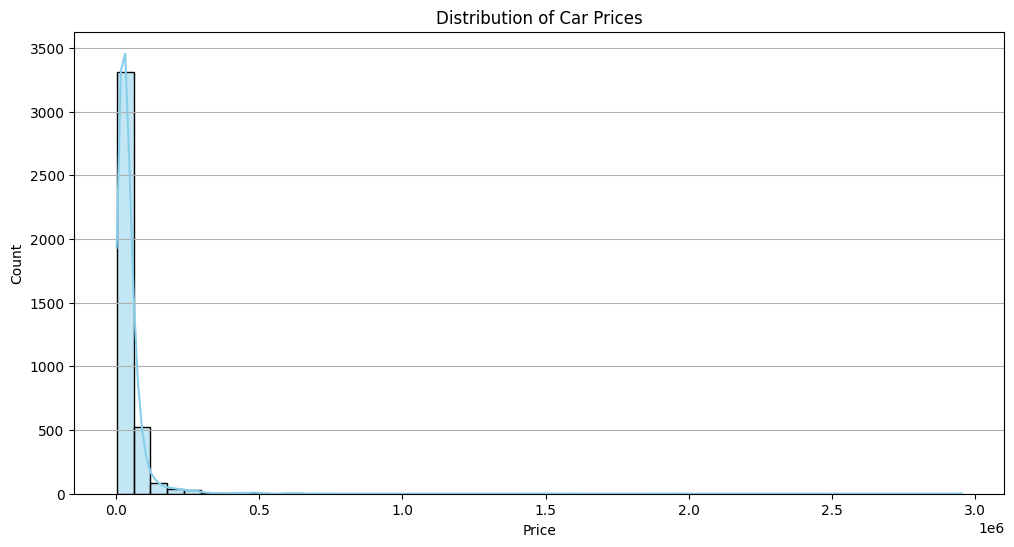

In [10]:
# Visualization 1: Distribution of car prices

plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


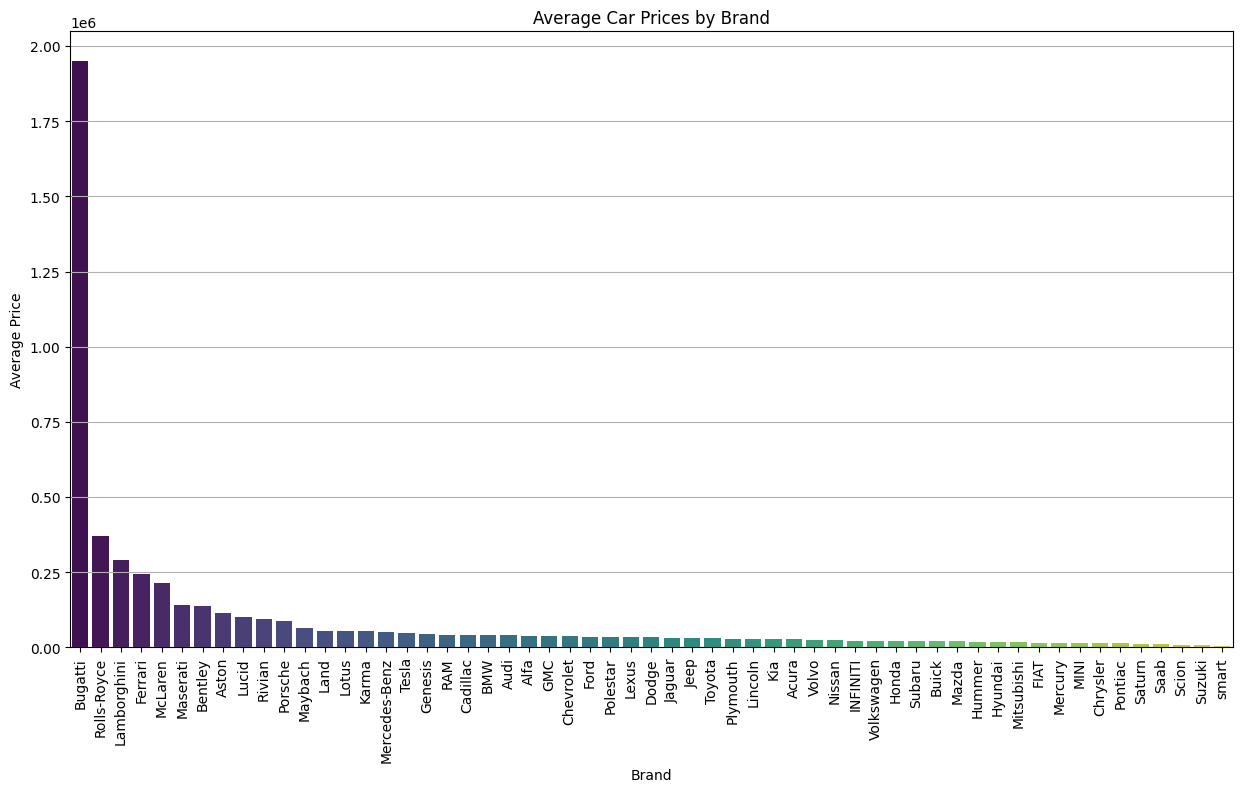

In [11]:
# Visualization 2: Average car prices by brand
plt.figure(figsize=(15, 8))
brand_price = data.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")
plt.title('Average Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


From the visualizations above, we can see the car brands that are the most expensive.

## Step 3: Modify
This step requires us to create, select, and transform variables on which to focus the model construction process. In this step, we also look for outliers and reduce the number of variables to only the most significant ones.

In this case, we will drop the interior and exterior color columns (int_col, ext_col) since those do not effect price.

For the sake of simplicity, we will also remove transmissions and fuel_type just to make things easier on ourselves.


In [12]:
# Dropping the 'int_col' and 'ext_col' columns
data = data.drop(columns=['int_col', 'ext_col'])

# Displaying the first few rows of the modified dataset
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,NaN,34999.0


In [13]:
data = data.drop(columns=['fuel_type', 'transmission'])

data.head()

,brand,model,model_year,milage,engine,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",3.5 Liter DOHC,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",2.0L I4 16V GDI DOHC Turbo,None reported,NaN,34999.0


In [14]:
data.columns

Index(['brand', 'model', 'model_year', 'milage', 'engine', 'accident',
       'clean_title', 'price'],
      dtype='object')

We have now modified the dataset to include only the columns that we care about that are related to price. We can now continue on to the Modeling step.

## Step 4: Model
In this step, the goal is to construct models that explain patterns in the data. This will require us to search for variable combinations that reliably predict an outcome that we desire.

In [15]:
from pycaret.regression import *

# Setup the PyCaret environment for regression
reg_setup = setup(data, target='price')


,Description,Value
0,Session id,4041
1,Target,price
2,Target type,Regression
3,Original data shape,"(4009, 8)"
4,Transformed data shape,"(4009, 8)"
5,Transformed train set shape,"(2806, 8)"
6,Transformed test set shape,"(1203, 8)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [16]:
# Compare performance of various regression models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,21344.1792,6434260203.8499,66403.8318,0.0445,0.7570,0.9028,0.3600
dummy,Dummy Regressor,29343.7848,6655284928.0000,68425.1816,-0.0067,0.9408,1.3596,0.1620
knn,K Neighbors Regressor,20637.5140,6633855641.6000,66130.6197,-0.0779,0.7258,0.9022,0.3440
par,Passive Aggressive Regressor,21459.7377,6975285335.4854,68798.2657,-0.2152,0.7430,0.7822,0.1780
rf,Random Forest Regressor,22080.3137,8345474489.4393,74960.1520,-0.9100,0.7377,0.9544,1.1600
huber,Huber Regressor,24474.3599,8249182916.2302,78328.3671,-0.9748,0.8061,1.0242,0.3400
xgboost,Extreme Gradient Boosting,20850.6561,9096060793.6000,75480.9744,-1.2575,0.7110,0.8792,0.6310
br,Bayesian Ridge,22742.8847,9107037279.1045,78199.8983,-1.3280,0.7820,0.9804,0.1660
ada,AdaBoost Regressor,24731.5258,9272674468.5314,77565.1883,-1.3306,0.8188,1.1296,0.3040
en,Elastic Net,23230.4560,9146947310.7068,78609.3040,-1.3478,0.7946,1.0256,0.3260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [17]:
# Hyperparameter tuning of the best model
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23793.0445,2561612081.6749,50612.3708,0.2722,0.7640,0.8878
1,30974.1630,31908838246.7721,178630.4516,0.0112,0.7858,0.9036
2,21494.7170,3323478808.7676,57649.6211,0.1898,0.8543,1.2188
3,18172.3260,887866724.7191,29797.0926,0.5039,0.6914,0.8401
4,26673.4735,14594439625.6278,120807.4486,0.0500,0.7617,0.9288
5,17645.1231,736902045.8224,27145.9398,0.4873,0.6738,0.8179
6,20219.3565,1491971523.2151,38626.0472,0.4302,0.7248,0.9075
7,17126.5406,1133693691.3981,33670.3682,0.3540,0.6760,0.7847
8,15992.2973,652827729.4114,25550.4937,0.5260,0.7397,0.9578


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3207, 7), (802, 7))

## Step 5: Assess
In this step, we evaluate the usefullness and reliability of the results from the data mining process. We can estimate how well the model performs, and see how effective the model is.

In [19]:
# Predicting on the test dataset
predictions = predict_model(best_model, data=X_test)
predictions

,brand,model,model_year,milage,engine,accident,clean_title,prediction_label
1687,Chevrolet,Camaro 1SS,2019,"19,200 mi.",455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,None reported,Yes,40450.775640
1059,Chevrolet,Silverado 3500 High Country,2015,"77,500 mi.",397.0HP 6.6L 8 Cylinder Engine Diesel Fuel,None reported,Yes,42587.889261
2565,Honda,Civic Sport,2021,"42,750 mi.",1.5L I4 16V GDI DOHC Turbo,None reported,Yes,23755.310678
2764,Honda,Accord Sport,2013,"405,000 mi.",185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,None reported,Yes,35212.961909
96,Jeep,Grand Cherokee Summit,2020,"31,349 mi.",5.7L V8 16V MPFI OHV,None reported,NaN,43798.626807
...,...,...,...,...,...,...,...,...
3251,Lexus,RX 350 Base,2021,"20,598 mi.",3.5L V6 24V PDI DOHC,At least 1 accident or damage reported,NaN,42727.306164
3225,Cadillac,ATS 2.5L Luxury,2013,"225,000 mi.",202.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,None reported,Yes,36947.417673
1950,Audi,Q7 3.0T Prestige,2018,"70,773 mi.",333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,None reported,Yes,43992.836590
1860,Land,Rover Defender,2022,"12,209 mi.",5.0L V8 32V GDI DOHC Supercharged,None reported,NaN,44427.030342


In [20]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

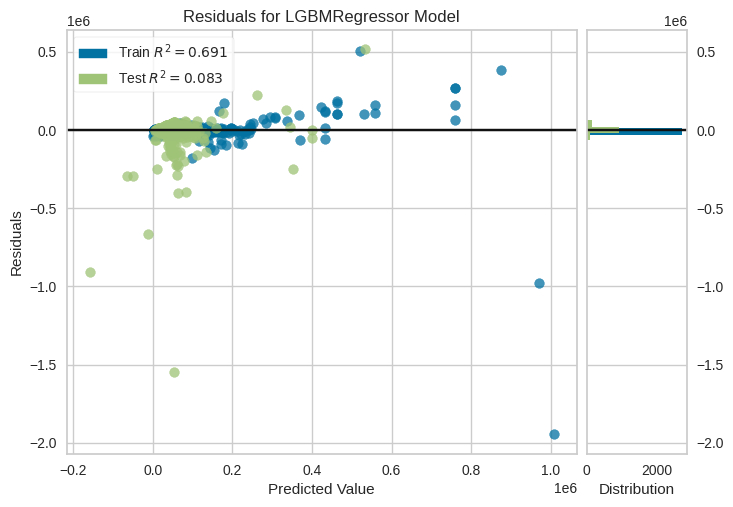

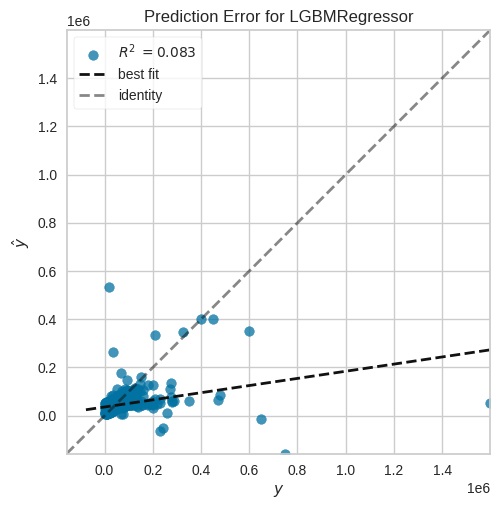

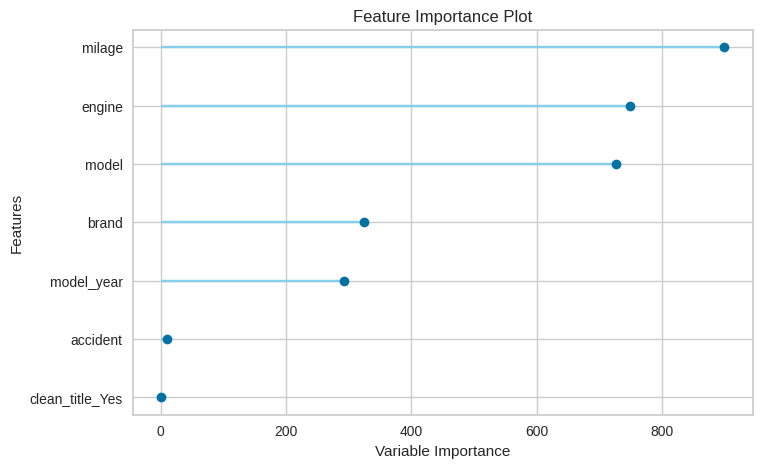

In [21]:
# Residuals Plot
plot_model(best_model, plot='residuals')

# Prediction Error Plot
plot_model(best_model, plot='error')

# Feature Importance Plot
plot_model(best_model, plot='feature')
